<a href="https://colab.research.google.com/github/DhanashreeYevle/COPD/blob/main/CSV_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Chronic Obstructive Pulmonary Disease Detection using Deep Learning

In [ ]:
# import neccassary libraries

#import numpy
import numpy as np

#import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#import pandas
import pandas as pd

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

#import tensorflow
import tensorflow as tf

#import sklearn
import sklearn
from sklearn import preprocessing

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense

# Understand columns
Unnamed: Serial number

ID:Unique ID

AGE:Age of the patient

PackHistory:person’s pack years smoking, where pack years is defined as twenty cigarettes smoked every day for one year

COPDSEVERITY:Severity of the disease
- MODERATE
- SEVERE
- Other

MWT1:Distance that patient walks in 6 minutes in meters (attempt 1)

MWT2:Distance that patient walks in 6 minutes in meters (attempt 2)

MWT1Best:Distance that patient walks in 6 minutes in meters (best attempt)

FEV1:Amount of air you can force from your lungs in one second in litres. Measure of lung function

FEV1PRED: is messures the stage of certain lung conditions like copd and asthma
- 80% or greater = normal

- 70% - 79% = mildly abnormal

- 60% - 69% = moderately abnormal

- 50% - 59% = moderate to severely abnormal

- 35% - 49% = severely abnormal

- less than 35% = very severely abnormal

FVC:total volume of air that a patient can forcibly exhale in one breath
(If fvc is lower than expected, somthing is restricting your breathing)

FVCPRED: FVC messurment

CAT:COPD assessment test
- score range is 0 to 40

- 0-9 = low impact

- 10-20 = medium impact

- 21-30 = high impact

- 31-40 = very high impact

HAD:Hospital anxiety and depression scale
- <7 = non cases

- 8 - 10 = mild

- 11 - 14 = moderate

- 15 - 21 = severe

SGRQ:(St george's respiratory questionnaire) Quality of life index. Lower the value, higher the quality of life
- range is 1 to 100.

- 0 indicate best helth

- 100 indicate worst health

AGEquartiles:Quartiles of Age

copd:COPD Gold Stages

- GOLD 1: Mild
- GOLD 2: Moderate
- GOLD 3: Severe
- GOLD 4: Very severe
gender:sex of the person. females - 0 males - 1

smoking: smoking patient or not
- 0 - no
- 1- yes

Diabetes: Diabetes patient or not
- 0 - no
- 1 - yes

muscular: muscular pain or not
- 0 - no
- 1 - yes

hypertension:High blodd pressure or not (normal 140/90)
- 0 - no
- 1 - yes

AtrialFib: (Atrial fibrillation) (irregular heart beat or not)
- 0 - no
- 1 - yes
IHD:(Ischemic heart disease) or not
- 0 - no
- 1 - yes

## Load dataset

In [ ]:
df=pd.read_csv(r"/content/drive/MyDrive/dataset.csv")
df.head()

,Unnamed: 0,ID,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,FVC,FVCPRED,CAT,HAD,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,1,58,77,60.0,SEVERE,120.0,120.0,120.0,1.21,36.0,2.40,98,25,8.0,69.55,4,3,1,2,1,0,0,1,0
1,2,57,79,50.0,MODERATE,165.0,176.0,176.0,1.09,56.0,1.64,65,12,21.0,44.24,4,2,0,2,1,0,0,1,1
2,3,62,80,11.0,MODERATE,201.0,180.0,201.0,1.52,68.0,2.30,86,22,18.0,44.09,4,2,0,2,1,0,0,1,0
3,4,145,56,60.0,VERY SEVERE,210.0,210.0,210.0,0.47,14.0,1.14,27,28,26.0,62.04,1,4,1,2,0,0,1,1,0
4,5,136,65,68.0,SEVERE,204.0,210.0,210.0,1.07,42.0,2.91,98,32,18.0,75.56,1,3,1,2,0,1,1,0,0


In [ ]:
df.copd.value_counts()

2    43
3    27
1    23
4     8
Name: copd, dtype: int64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Prepration

In [ ]:
# chech shape
df.shape

(101, 24)

In [ ]:
# check data indormationa
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 99
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AGE           99 non-null     int64  
 1   PackHistory   99 non-null     float64
 2   COPDSEVERITY  99 non-null     object 
 3   MWT1          99 non-null     float64
 4   MWT2          99 non-null     float64
 5   MWT1Best      99 non-null     float64
 6   FEV1          99 non-null     float64
 7   FEV1PRED      99 non-null     float64
 8   FVC           99 non-null     float64
 9   FVCPRED       99 non-null     int64  
 10  CAT           99 non-null     int64  
 11  HAD           99 non-null     float64
 12  SGRQ          99 non-null     float64
 13  AGEquartiles  99 non-null     int64  
 14  copd          99 non-null     int64  
 15  gender        99 non-null     int64  
 16  smoking       99 non-null     int64  
 17  Diabetes      99 non-null     int64  
 18  muscular      99 non-null     in

**Interpretation:**Here we see that 14 numeric variable and 1 categorical variable.

In [ ]:
# check missing value by %
(df.isnull().sum()*100)/(len(df.ID))

Unnamed: 0      0.000000
ID              0.000000
AGE             0.000000
PackHistory     0.000000
COPDSEVERITY    0.000000
MWT1            1.980198
MWT2            0.990099
MWT1Best        0.990099
FEV1            0.000000
FEV1PRED        0.000000
FVC             0.000000
FVCPRED         0.000000
CAT             0.000000
HAD             0.000000
SGRQ            0.000000
AGEquartiles    0.000000
copd            0.000000
gender          0.000000
smoking         0.000000
Diabetes        0.000000
muscular        0.000000
hypertension    0.000000
AtrialFib       0.000000
IHD             0.000000
dtype: float64

In [ ]:
# drop the column
df.dropna(axis=0,inplace=True)
df.shape

(99, 24)

**Interpretation:** It's health data so,it's critical to fill value with other so we drop the missing value

In [ ]:
# remove insignificant variable
df.drop(["Unnamed: 0",'ID'],axis=1,inplace=True)
df.head()

,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,FVC,FVCPRED,CAT,HAD,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,77,60.0,SEVERE,120.0,120.0,120.0,1.21,36.0,2.40,98,25,8.0,69.55,4,3,1,2,1,0,0,1,0
1,79,50.0,MODERATE,165.0,176.0,176.0,1.09,56.0,1.64,65,12,21.0,44.24,4,2,0,2,1,0,0,1,1
2,80,11.0,MODERATE,201.0,180.0,201.0,1.52,68.0,2.30,86,22,18.0,44.09,4,2,0,2,1,0,0,1,0
3,56,60.0,VERY SEVERE,210.0,210.0,210.0,0.47,14.0,1.14,27,28,26.0,62.04,1,4,1,2,0,0,1,1,0
4,65,68.0,SEVERE,204.0,210.0,210.0,1.07,42.0,2.91,98,32,18.0,75.56,1,3,1,2,0,1,1,0,0


**Interpretation:** Remove id and 0 column because it's unique value and not usefull for predict output

In [ ]:
# filter data
#target variable

df_target=df.copd
df_heart=df.drop('copd',axis=1)

#categorical
df_Cat=df.select_dtypes(include=['object'])
df_Cat.head()

#numeric
df_num=df.select_dtypes(include=['number']).reset_index(drop=True)
df_num=df_num.drop('copd',axis=1)
df_num.head()

,AGE,PackHistory,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,FVC,FVCPRED,CAT,HAD,SGRQ,AGEquartiles,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,77,60.0,120.0,120.0,120.0,1.21,36.0,2.40,98,25,8.0,69.55,4,1,2,1,0,0,1,0
1,79,50.0,165.0,176.0,176.0,1.09,56.0,1.64,65,12,21.0,44.24,4,0,2,1,0,0,1,1
2,80,11.0,201.0,180.0,201.0,1.52,68.0,2.30,86,22,18.0,44.09,4,0,2,1,0,0,1,0
3,56,60.0,210.0,210.0,210.0,0.47,14.0,1.14,27,28,26.0,62.04,1,1,2,0,0,1,1,0
4,65,68.0,204.0,210.0,210.0,1.07,42.0,2.91,98,32,18.0,75.56,1,1,2,0,1,1,0,0


In [ ]:
df_num

,AGE,PackHistory,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,FVC,FVCPRED,CAT,HAD,SGRQ,AGEquartiles,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,77,60.0,120.0,120.0,120.0,1.21,36.00,2.40,98,25,8.0,69.55,4,1,2,1,0,0,1,0
1,79,50.0,165.0,176.0,176.0,1.09,56.00,1.64,65,12,21.0,44.24,4,0,2,1,0,0,1,1
2,80,11.0,201.0,180.0,201.0,1.52,68.00,2.30,86,22,18.0,44.09,4,0,2,1,0,0,1,0
3,56,60.0,210.0,210.0,210.0,0.47,14.00,1.14,27,28,26.0,62.04,1,1,2,0,0,1,1,0
4,65,68.0,204.0,210.0,210.0,1.07,42.00,2.91,98,32,18.0,75.56,1,1,2,0,1,1,0,0
5,67,26.0,216.0,180.0,216.0,1.09,50.00,1.99,60,29,21.0,73.82,2,0,1,1,0,0,1,0
6,67,50.0,214.0,237.0,237.0,0.69,35.00,1.31,48,29,30.0,77.44,2,0,1,1,0,0,1,0
7,83,90.0,214.0,237.0,237.0,0.68,32.00,2.23,77,22,2.0,45.41,4,1,2,1,0,0,1,0
8,72,50.0,231.0,237.0,237.0,2.13,63.00,4.38,80,25,6.0,69.61,3,1,1,1,0,0,1,0
9,75,6.0,226.0,240.0,240.0,1.06,46.00,2.06,75,31,20.0,55.56,3,0,2,0,1,0,0,0


In [ ]:
# encode cetegorical data
# use label encoding
label_encode=preprocessing.LabelEncoder()
label=label_encode.fit_transform(df['COPDSEVERITY'])
label
df_char_label = pd.DataFrame(label, columns = ['COPDSEVERITY']).reset_index(drop=True)
df_char_label

,COPDSEVERITY
0,2
1,1
2,1
3,3
4,2
5,1
6,2
7,2
8,1
9,2


In [ ]:
df_num

In [ ]:
#scaling data
from sklearn.preprocessing import StandardScaler
# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numerical columns
df_scale = X_scaler.fit_transform(df_num)

# create a dataframe of scaled numerical variables
df_num_scaled = pd.DataFrame(df_scale, columns = df_num.columns).reset_index(drop=True)
df_num_scaled.shape

(99, 20)

In [ ]:
# merged scale and encode datafram
df_concat=pd.concat([df_num_scaled,df_char_label],axis=1)
df_concat.reset_index(inplace=True,drop=True)
df_concat.shape

(99, 21)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
y_ = df_target.values.reshape(-1, 1)
encoder = OneHotEncoder(sparse=False)
df_target = encoder.fit_transform(y_)

In [ ]:
#split data
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(df_concat,df_target, random_state=1, test_size = 0.21)

In [ ]:
#convert data frame to array
x_train=X_train_full.to_numpy()
y_train=y_train_full
x_test=X_test_full.to_numpy()
y_test=y_test_full

## MLP(Multilayer Perceptron) model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=21))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

# Compile your MLP model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train your MLP model and store the training history in a variable named `history`
history = model.fit(x_train, y_train, epochs=200, batch_size=32,validation_data=(x_test, y_test))

Epoch 1/200
3/3 [==============================] - 2s 140ms/step - loss: 1.6449 - accuracy: 0.2051 - val_loss: 1.3906 - val_accuracy: 0.2381
Epoch 2/200
3/3 [==============================] - 0s 23ms/step - loss: 1.6719 - accuracy: 0.1026 - val_loss: 1.3383 - val_accuracy: 0.3333
Epoch 3/200
3/3 [==============================] - 0s 33ms/step - loss: 1.4897 - accuracy: 0.1795 - val_loss: 1.2914 - val_accuracy: 0.4762
Epoch 4/200
3/3 [==============================] - 0s 23ms/step - loss: 1.5107 - accuracy: 0.1923 - val_loss: 1.2514 - val_accuracy: 0.5238
Epoch 5/200
3/3 [==============================] - 0s 30ms/step - loss: 1.5048 - accuracy: 0.2564 - val_loss: 1.2169 - val_accuracy: 0.5238
Epoch 6/200
3/3 [==============================] - 0s 30ms/step - loss: 1.3805 - accuracy: 0.3205 - val_loss: 1.1871 - val_accuracy: 0.6190
Epoch 7/200
3/3 [==============================] - 0s 34ms/step - loss: 1.3228 - accuracy: 0.3718 - val_loss: 1.1601 - val_accuracy: 0.6190
Epoch 8/200
3/3 [==

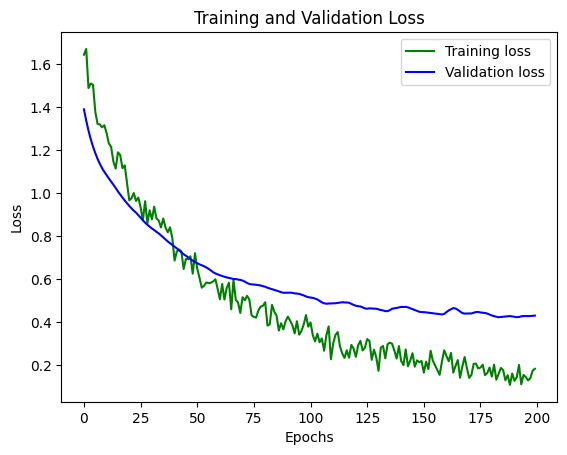

In [ ]:
# Get training loss values
training_loss = history.history['loss']

# Get validation loss values
val_loss = history.history['val_loss']

# Define number of epochs
epochs = range(len(training_loss))

# Create a line plot for training and validation loss
plt.plot(epochs, training_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

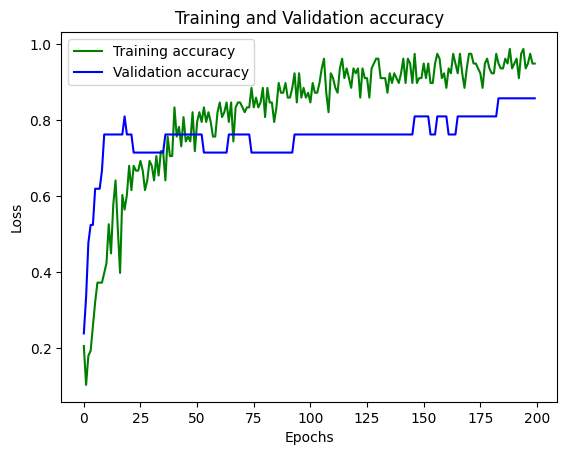

In [ ]:
# Get training loss values
training_loss = history.history['accuracy']

# Get validation loss values
val_loss = history.history['val_accuracy']

# Define number of epochs
epochs = range(len(training_loss))

# Create a line plot for training and validation loss
plt.plot(epochs, training_loss, 'g', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#evaluate model
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 36ms/step - loss: 0.4297 - accuracy: 0.8571


[0.4297316074371338, 0.8571428656578064]

In [ ]:
#adam, mlp,batch 16
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=21))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

# Compile your MLP model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train your MLP model and store the training history in a variable named `history`
history = model.fit(x_train, y_train, epochs=200, batch_size=16,validation_data=(x_test, y_test))
#evaluate model
model.evaluate(x_test,y_test)

Epoch 1/200
5/5 [==============================] - 1s 52ms/step - loss: 1.8009 - accuracy: 0.1795 - val_loss: 1.8971 - val_accuracy: 0.2381
Epoch 2/200
5/5 [==============================] - 0s 15ms/step - loss: 1.6333 - accuracy: 0.2692 - val_loss: 1.7579 - val_accuracy: 0.2381
Epoch 3/200
5/5 [==============================] - 0s 14ms/step - loss: 1.5778 - accuracy: 0.3205 - val_loss: 1.6454 - val_accuracy: 0.2857
Epoch 4/200
5/5 [==============================] - 0s 14ms/step - loss: 1.4872 - accuracy: 0.2821 - val_loss: 1.5512 - val_accuracy: 0.2857
Epoch 5/200
5/5 [==============================] - 0s 10ms/step - loss: 1.3533 - accuracy: 0.4103 - val_loss: 1.4720 - val_accuracy: 0.3810
Epoch 6/200
5/5 [==============================] - 0s 10ms/step - loss: 1.3510 - accuracy: 0.3974 - val_loss: 1.4037 - val_accuracy: 0.3810
Epoch 7/200
5/5 [==============================] - 0s 10ms/step - loss: 1.3452 - accuracy: 0.3846 - val_loss: 1.3420 - val_accuracy: 0.4286
Epoch 8/200
5/5 [===

[0.2891089916229248, 0.8571428656578064]

In [ ]:
#sgd,32,sparse
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=21))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

# Compile your MLP model
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Train your MLP model and store the training history in a variable named `history`
history = model.fit(x_train, y_train, epochs=200, batch_size=32,validation_data=(x_test, y_test))
#evaluate model
model.evaluate(x_test,y_test)

Epoch 1/200
3/3 [==============================] - 1s 108ms/step - loss: 1.5821 - accuracy: 0.2051 - val_loss: 1.5407 - val_accuracy: 0.0952
Epoch 2/200
3/3 [==============================] - 0s 19ms/step - loss: 1.5122 - accuracy: 0.2051 - val_loss: 1.5098 - val_accuracy: 0.0952
Epoch 3/200
3/3 [==============================] - 0s 21ms/step - loss: 1.4712 - accuracy: 0.2692 - val_loss: 1.4782 - val_accuracy: 0.0952
Epoch 4/200
3/3 [==============================] - 0s 27ms/step - loss: 1.6018 - accuracy: 0.1538 - val_loss: 1.4472 - val_accuracy: 0.0952
Epoch 5/200
3/3 [==============================] - 0s 32ms/step - loss: 1.5029 - accuracy: 0.2692 - val_loss: 1.4165 - val_accuracy: 0.1905
Epoch 6/200
3/3 [==============================] - 0s 19ms/step - loss: 1.4450 - accuracy: 0.2692 - val_loss: 1.3897 - val_accuracy: 0.2381
Epoch 7/200
3/3 [==============================] - 0s 29ms/step - loss: 1.4810 - accuracy: 0.2051 - val_loss: 1.3672 - val_accuracy: 0.2857
Epoch 8/200
3/3 [==

[0.5680733919143677, 0.7142857313156128]

In [ ]:
# max value take from the array
y_predicted=model.predict(x_test[0:100])
output=[np.argmax(element) for element in y_predicted]

In [ ]:
#SGD optimizer
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=21))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

# Compile your MLP model
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Train your MLP model and store the training history in a variable named `history`
history = model.fit(x_train, y_train, epochs=200, batch_size=16,validation_data=(x_test, y_test))

Epoch 1/200
5/5 [==============================] - 4s 225ms/step - loss: 1.3849 - accuracy: 0.3333 - val_loss: 1.2534 - val_accuracy: 0.4762
Epoch 2/200
5/5 [==============================] - 0s 28ms/step - loss: 1.3940 - accuracy: 0.3718 - val_loss: 1.2333 - val_accuracy: 0.4762
Epoch 3/200
5/5 [==============================] - 0s 22ms/step - loss: 1.4029 - accuracy: 0.3333 - val_loss: 1.2169 - val_accuracy: 0.5238
Epoch 4/200
5/5 [==============================] - 0s 21ms/step - loss: 1.4589 - accuracy: 0.2692 - val_loss: 1.1997 - val_accuracy: 0.5238
Epoch 5/200
5/5 [==============================] - 0s 22ms/step - loss: 1.3474 - accuracy: 0.3718 - val_loss: 1.1850 - val_accuracy: 0.5238
Epoch 6/200
5/5 [==============================] - 0s 20ms/step - loss: 1.2831 - accuracy: 0.4487 - val_loss: 1.1699 - val_accuracy: 0.5238
Epoch 7/200
5/5 [==============================] - 0s 26ms/step - loss: 1.3265 - accuracy: 0.4103 - val_loss: 1.1560 - val_accuracy: 0.5238
Epoch 8/200
5/5 [==

In [ ]:
#evaluate model
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 32ms/step - loss: 0.5486 - accuracy: 0.7619


[0.5485996007919312, 0.761904776096344]

In [ ]:
#Rmsprop optimizer,16,mlp
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=21))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

# Compile your MLP model
model.compile(loss='categorical_crossentropy', optimizer='Rmsprop', metrics=['accuracy'])

# Train your MLP model and store the training history in a variable named `history`
history = model.fit(x_train, y_train, epochs=200, batch_size=16,validation_data=(x_test, y_test))
#evaluate model
model.evaluate(x_test,y_test)

Epoch 1/200
5/5 [==============================] - 1s 61ms/step - loss: 1.6328 - accuracy: 0.1154 - val_loss: 1.4856 - val_accuracy: 0.0476
Epoch 2/200
5/5 [==============================] - 0s 16ms/step - loss: 1.4978 - accuracy: 0.2692 - val_loss: 1.3861 - val_accuracy: 0.1429
Epoch 3/200
5/5 [==============================] - 0s 16ms/step - loss: 1.3710 - accuracy: 0.3333 - val_loss: 1.3216 - val_accuracy: 0.2381
Epoch 4/200
5/5 [==============================] - 0s 14ms/step - loss: 1.3745 - accuracy: 0.2949 - val_loss: 1.2737 - val_accuracy: 0.4286
Epoch 5/200
5/5 [==============================] - 0s 17ms/step - loss: 1.3177 - accuracy: 0.3590 - val_loss: 1.2291 - val_accuracy: 0.5238
Epoch 6/200
5/5 [==============================] - 0s 12ms/step - loss: 1.2088 - accuracy: 0.4359 - val_loss: 1.1950 - val_accuracy: 0.6667
Epoch 7/200
5/5 [==============================] - 0s 12ms/step - loss: 1.2374 - accuracy: 0.4231 - val_loss: 1.1580 - val_accuracy: 0.6667
Epoch 8/200
5/5 [===

[0.2255210429430008, 0.9523809552192688]

Epoch 1/200
5/5 [==============================] - 1s 59ms/step - loss: 1.5074 - accuracy: 0.3205 - val_loss: 1.2502 - val_accuracy: 0.3333
Epoch 2/200
5/5 [==============================] - 0s 11ms/step - loss: 1.3946 - accuracy: 0.3718 - val_loss: 1.1991 - val_accuracy: 0.3333
Epoch 3/200
5/5 [==============================] - 0s 14ms/step - loss: 1.3061 - accuracy: 0.3974 - val_loss: 1.1658 - val_accuracy: 0.3810
Epoch 4/200
5/5 [==============================] - 0s 16ms/step - loss: 1.2730 - accuracy: 0.4231 - val_loss: 1.1305 - val_accuracy: 0.4286
Epoch 5/200
5/5 [==============================] - 0s 17ms/step - loss: 1.2215 - accuracy: 0.5256 - val_loss: 1.1054 - val_accuracy: 0.4286
Epoch 6/200
5/5 [==============================] - 0s 19ms/step - loss: 1.1139 - accuracy: 0.5128 - val_loss: 1.0740 - val_accuracy: 0.4762
Epoch 7/200
5/5 [==============================] - 0s 16ms/step - loss: 1.2023 - accuracy: 0.4359 - val_loss: 1.0481 - val_accuracy: 0.4762
Epoch 8/200
5/5 [===

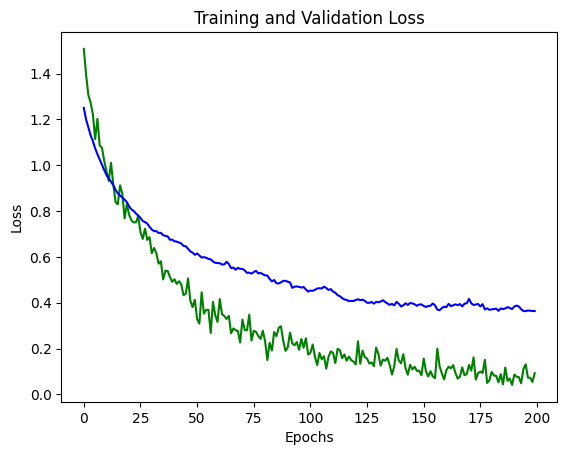

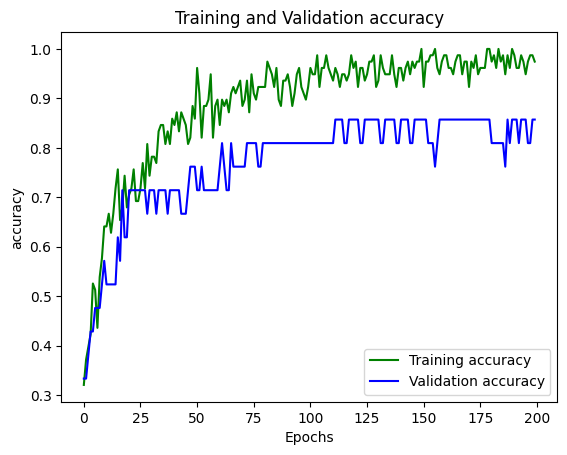

In [ ]:
#Rmsprop optimizer,16,mlp
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=21))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

# Compile your MLP model
model.compile(loss='categorical_crossentropy', optimizer='Rmsprop', metrics=['accuracy'])

# Train your MLP model and store the training history in a variable named `history`
history = model.fit(x_train, y_train, epochs=200, batch_size=16,validation_data=(x_test, y_test))
#evaluate model
model.evaluate(x_test,y_test)
# Get training loss values
training_loss = history.history['loss']

# Get validation loss values
val_loss = history.history['val_loss']

# Define number of epochs
epochs = range(len(training_loss))

# Create a line plot for training and validation loss
plt.plot(epochs, training_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
plt.legend()

#rnn
# Get training accuracy values
training_loss = history.history['accuracy']

# Get validation accuracy values
val_loss = history.history['val_accuracy']

# Define number of epochs
epochs = range(len(training_loss))

# Create a line plot for training and validation loss
plt.plot(epochs, training_loss, 'g', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

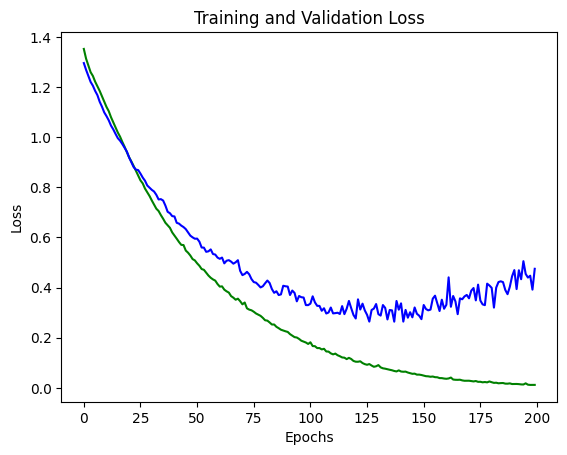

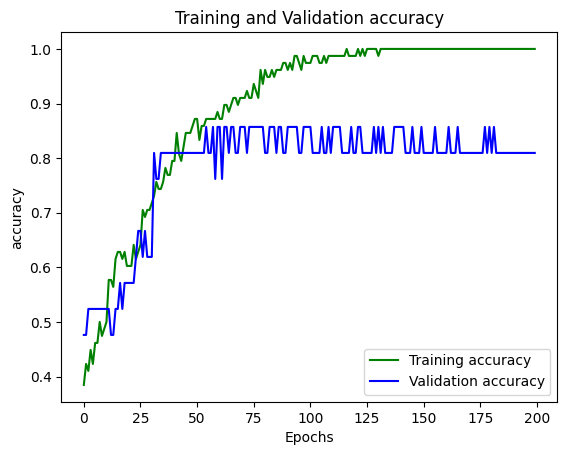

In [ ]:
# Get training loss values
training_loss = history.history['loss']

# Get validation loss values
val_loss = history.history['val_loss']

# Define number of epochs
epochs = range(len(training_loss))

# Create a line plot for training and validation loss
plt.plot(epochs, training_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
plt.legend()


# Get training accuracy values
training_loss = history.history['accuracy']

# Get validation accuracy values
val_loss = history.history['val_accuracy']

# Define number of epochs
epochs = range(len(training_loss))

# Create a line plot for training and validation loss
plt.plot(epochs, training_loss, 'g', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
#Rmsprop optimizer,32,mlp
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=21))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

# Compile your MLP model
model.compile(loss='categorical_crossentropy', optimizer='Rmsprop', metrics=['accuracy'])

# Train your MLP model and store the training history in a variable named `history`
history = model.fit(x_train, y_train, epochs=200, batch_size=32,validation_data=(x_test, y_test))
#evaluate model
model.evaluate(x_test,y_test)

Epoch 1/200
3/3 [==============================] - 2s 283ms/step - loss: 1.6118 - accuracy: 0.2179 - val_loss: 1.5520 - val_accuracy: 0.1905
Epoch 2/200
3/3 [==============================] - 0s 24ms/step - loss: 1.6304 - accuracy: 0.2308 - val_loss: 1.4857 - val_accuracy: 0.2381
Epoch 3/200
3/3 [==============================] - 0s 31ms/step - loss: 1.5465 - accuracy: 0.2179 - val_loss: 1.4328 - val_accuracy: 0.2857
Epoch 4/200
3/3 [==============================] - 0s 29ms/step - loss: 1.4165 - accuracy: 0.3462 - val_loss: 1.4057 - val_accuracy: 0.2857
Epoch 5/200
3/3 [==============================] - 0s 29ms/step - loss: 1.4252 - accuracy: 0.3077 - val_loss: 1.3689 - val_accuracy: 0.3333
Epoch 6/200
3/3 [==============================] - 0s 21ms/step - loss: 1.3849 - accuracy: 0.3974 - val_loss: 1.3379 - val_accuracy: 0.3810
Epoch 7/200
3/3 [==============================] - 0s 33ms/step - loss: 1.3221 - accuracy: 0.4231 - val_loss: 1.3146 - val_accuracy: 0.3810
Epoch 8/200
3/3 [==

[0.3625432848930359, 0.8095238208770752]

## CNN(Convolutional Neural Network) model Conv1D

In [ ]:
#CNN
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from sklearn.model_selection import train_test_split

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
print(x_train.shape)
#(78, 22, 1)
model = Sequential()
model.add(Conv1D(64, 2, activation="relu", input_shape=(21,1)))
model.add(Dense(16, activation="relu"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(4, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
model.summary()

# Train your CNN model
history=model.fit(x_train, y_train,batch_size=32, epochs=200,validation_data=(x_test, y_test))
#evaluate CNN model
model.evaluate(x_test,y_test)

(78, 21, 1)
Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 20, 64)            192       
                                                                 
 dense_92 (Dense)            (None, 20, 16)            1040      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 10, 16)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 160)               0         
                                                                 
 dense_93 (Dense)            (None, 4)                 644       
                                                                 
Total params: 1,876
Trainable params: 1,876
Non-trainable params: 0
_______________________________________

[0.23078884184360504, 0.9047619104385376]

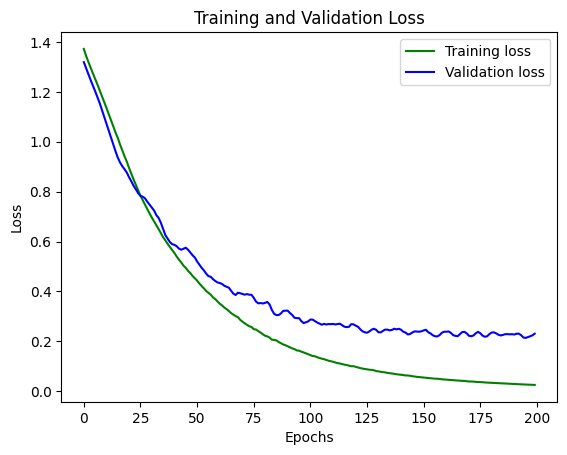

In [ ]:
# Get training loss values
training_loss = history.history['loss']

# Get validation loss values
val_loss = history.history['val_loss']

# Define number of epochs
epochs = range(len(training_loss))

# Create a line plot for training and validation loss
plt.plot(epochs, training_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

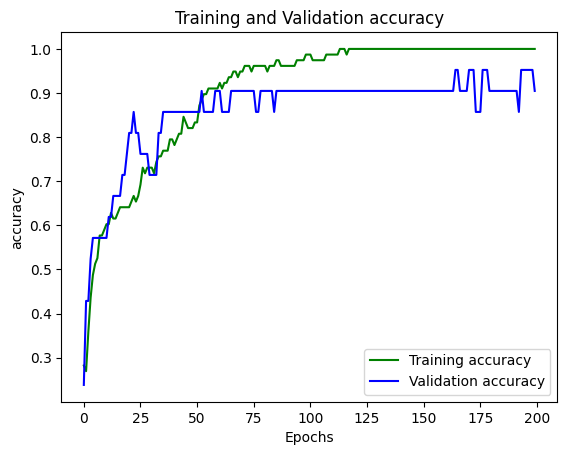

In [ ]:
# Get training loss values
training_loss = history.history['accuracy']

# Get validation loss values
val_loss = history.history['val_accuracy']

# Define number of epochs
epochs = range(len(training_loss))

# Create a line plot for training and validation loss
plt.plot(epochs, training_loss, 'g', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
#CNN,adam,16
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from sklearn.model_selection import train_test_split

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
print(x_train.shape)
#(78, 22, 1)
model = Sequential()
model.add(Conv1D(64, 2, activation="relu", input_shape=(21,1)))
model.add(Dense(16, activation="relu"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(4, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
model.summary()

# Train your CNN model
history=model.fit(x_train, y_train,batch_size=16, epochs=200,validation_data=(x_test, y_test))
#evaluate CNN model
model.evaluate(x_test,y_test)

(78, 21, 1)
Model: "sequential_98"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 20, 64)            192       
                                                                 
 dense_160 (Dense)           (None, 20, 16)            1040      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 10, 16)           0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 160)               0         
                                                                 
 dense_161 (Dense)           (None, 4)                 644       
                                                                 
Total params: 1,876
Trainable params: 1,876
Non-trainable params: 0
_______________________________________

[0.35278910398483276, 0.8095238208770752]

In [ ]:
#CNN,sgd,32
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from sklearn.model_selection import train_test_split

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
print(x_train.shape)
#(78, 22, 1)
model = Sequential()
model.add(Conv1D(64, 2, activation="relu", input_shape=(21,1)))
model.add(Dense(16, activation="relu"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(4, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = "SGD", metrics = ['accuracy'])
model.summary()

# Train your CNN model
history=model.fit(x_train, y_train,batch_size=32, epochs=200,validation_data=(x_test, y_test))
#evaluate CNN model
model.evaluate(x_test,y_test)

(78, 21, 1)
Model: "sequential_99"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 20, 64)            192       
                                                                 
 dense_162 (Dense)           (None, 20, 16)            1040      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 10, 16)           0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 160)               0         
                                                                 
 dense_163 (Dense)           (None, 4)                 644       
                                                                 
Total params: 1,876
Trainable params: 1,876
Non-trainable params: 0
_______________________________________

[0.5743106007575989, 0.7142857313156128]

In [ ]:
#CNN,sgd,16
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from sklearn.model_selection import train_test_split

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
print(x_train.shape)
#(78, 22, 1)
model = Sequential()
model.add(Conv1D(64, 2, activation="relu", input_shape=(21,1)))
model.add(Dense(16, activation="relu"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(4, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = "SGD", metrics = ['accuracy'])
model.summary()

# Train your CNN model
history=model.fit(x_train, y_train,batch_size=16, epochs=200,validation_data=(x_test, y_test))
#evaluate CNN model
model.evaluate(x_test,y_test)

(78, 21, 1)
Model: "sequential_101"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 20, 64)            192       
                                                                 
 dense_166 (Dense)           (None, 20, 16)            1040      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 10, 16)           0         
 1D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 160)               0         
                                                                 
 dense_167 (Dense)           (None, 4)                 644       
                                                                 
Total params: 1,876
Trainable params: 1,876
Non-trainable params: 0
______________________________________

[0.3860001266002655, 0.8571428656578064]

In [ ]:
#CNN,rms prop,16
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from sklearn.model_selection import train_test_split

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
print(x_train.shape)
#(78, 22, 1)
model = Sequential()
model.add(Conv1D(64, 2, activation="relu", input_shape=(21,1)))
model.add(Dense(16, activation="relu"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(4, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = "RMSprop", metrics = ['accuracy'])
model.summary()

# Train your CNN model
history=model.fit(x_train, y_train,batch_size=16, epochs=200,validation_data=(x_test, y_test))
#evaluate CNN model
model.evaluate(x_test,y_test)

(78, 21, 1)
Model: "sequential_102"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 20, 64)            192       
                                                                 
 dense_168 (Dense)           (None, 20, 16)            1040      
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 10, 16)           0         
 1D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 160)               0         
                                                                 
 dense_169 (Dense)           (None, 4)                 644       
                                                                 
Total params: 1,876
Trainable params: 1,876
Non-trainable params: 0
______________________________________

[0.3418971300125122, 0.8571428656578064]

In [ ]:
#CNN,rms prop,32
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from sklearn.model_selection import train_test_split

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
print(x_train.shape)
#(78, 22, 1)
model = Sequential()
model.add(Conv1D(64, 2, activation="relu", input_shape=(21,1)))
model.add(Dense(16, activation="relu"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(4, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = "RMSprop", metrics = ['accuracy'])
model.summary()

# Train your CNN model
history=model.fit(x_train, y_train,batch_size=32, epochs=200,validation_data=(x_test, y_test))
#evaluate CNN model
model.evaluate(x_test,y_test)

(78, 21, 1)
Model: "sequential_105"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 20, 64)            192       
                                                                 
 dense_174 (Dense)           (None, 20, 16)            1040      
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 10, 16)           0         
 1D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 160)               0         
                                                                 
 dense_175 (Dense)           (None, 4)                 644       
                                                                 
Total params: 1,876
Trainable params: 1,876
Non-trainable params: 0
______________________________________

[0.47480854392051697, 0.8095238208770752]

## RNN(Recurrent Neural Network) model

In [ ]:
# RNN model
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# Reshape the input data for use in an RNN
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Define your RNN model
model = Sequential()
model.add(SimpleRNN(64,input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(4, activation='softmax'))

# Compile your RNN model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train your RNN model
history=model.fit(x_train, y_train,epochs=200,batch_size=16,validation_data=(x_test, y_test))


Epoch 1/200
5/5 [==============================] - 57s 197ms/step - loss: 1.3458 - accuracy: 0.3462 - val_loss: 1.1353 - val_accuracy: 0.5714
Epoch 2/200
5/5 [==============================] - 0s 39ms/step - loss: 1.0343 - accuracy: 0.6154 - val_loss: 1.0939 - val_accuracy: 0.5238
Epoch 3/200
5/5 [==============================] - 0s 43ms/step - loss: 0.9030 - accuracy: 0.6667 - val_loss: 1.0322 - val_accuracy: 0.5238
Epoch 4/200
5/5 [==============================] - 0s 38ms/step - loss: 0.8188 - accuracy: 0.6795 - val_loss: 0.9849 - val_accuracy: 0.6667
Epoch 5/200
5/5 [==============================] - 0s 41ms/step - loss: 0.7490 - accuracy: 0.7179 - val_loss: 0.9015 - val_accuracy: 0.7143
Epoch 6/200
5/5 [==============================] - 0s 37ms/step - loss: 0.6901 - accuracy: 0.7949 - val_loss: 0.8454 - val_accuracy: 0.6667
Epoch 7/200
5/5 [==============================] - 0s 39ms/step - loss: 0.6367 - accuracy: 0.8077 - val_loss: 0.8027 - val_accuracy: 0.6667
Epoch 8/200
5/5 [=

In [ ]:
# RNN model
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# Reshape the input data for use in an RNN
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Define your RNN model
model = Sequential()
model.add(SimpleRNN(64,input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(4, activation='softmax'))

# Compile your RNN model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train your RNN model
history=model.fit(x_train, y_train,epochs=200,batch_size=16,validation_data=(x_test, y_test))


Epoch 1/200
5/5 [==============================] - 7s 266ms/step - loss: nan - accuracy: 0.2152 - val_loss: nan - val_accuracy: 0.2727
Epoch 2/200
5/5 [==============================] - 0s 51ms/step - loss: nan - accuracy: 0.2152 - val_loss: nan - val_accuracy: 0.2727
Epoch 3/200
5/5 [==============================] - 0s 70ms/step - loss: nan - accuracy: 0.2152 - val_loss: nan - val_accuracy: 0.2727
Epoch 4/200
5/5 [==============================] - 0s 59ms/step - loss: nan - accuracy: 0.2152 - val_loss: nan - val_accuracy: 0.2727
Epoch 5/200
5/5 [==============================] - 0s 55ms/step - loss: nan - accuracy: 0.2152 - val_loss: nan - val_accuracy: 0.2727
Epoch 6/200
5/5 [==============================] - 0s 23ms/step - loss: nan - accuracy: 0.2152 - val_loss: nan - val_accuracy: 0.2727
Epoch 7/200
5/5 [==============================] - 0s 21ms/step - loss: nan - accuracy: 0.2152 - val_loss: nan - val_accuracy: 0.2727
Epoch 8/200
5/5 [==============================] - 0s 22ms/st

In [ ]:
# RNN model,32,adam
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# Reshape the input data for use in an RNN
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Define your RNN model
model = Sequential()
model.add(SimpleRNN(64,input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(4, activation='softmax'))

# Compile your RNN model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train your RNN model
history=model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/200
3/3 [==============================] - 3s 304ms/step - loss: nan - accuracy: 0.3418 - val_loss: nan - val_accuracy: 0.2727
Epoch 2/200
3/3 [==============================] - 0s 51ms/step - loss: nan - accuracy: 0.2152 - val_loss: nan - val_accuracy: 0.2727
Epoch 3/200
3/3 [==============================] - 0s 47ms/step - loss: nan - accuracy: 0.2152 - val_loss: nan - val_accuracy: 0.2727
Epoch 4/200
3/3 [==============================] - 0s 40ms/step - loss: nan - accuracy: 0.2152 - val_loss: nan - val_accuracy: 0.2727
Epoch 5/200
3/3 [==============================] - 0s 47ms/step - loss: nan - accuracy: 0.2152 - val_loss: nan - val_accuracy: 0.2727
Epoch 6/200
3/3 [==============================] - 0s 49ms/step - loss: nan - accuracy: 0.2152 - val_loss: nan - val_accuracy: 0.2727
Epoch 7/200
3/3 [==============================] - 0s 43ms/step - loss: nan - accuracy: 0.2152 - val_loss: nan - val_accuracy: 0.2727
Epoch 8/200
3/3 [==============================] - 0s 39ms/st

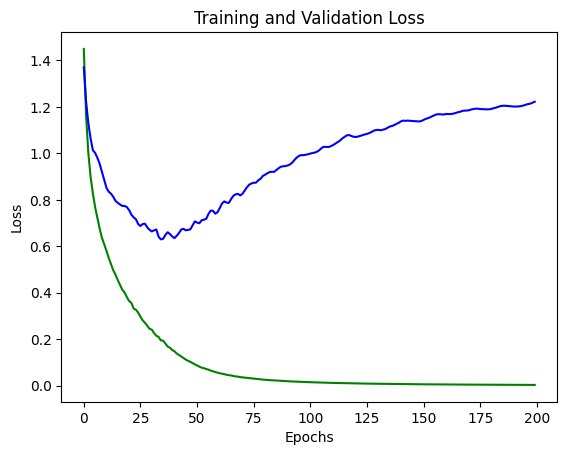

In [ ]:
# Get training loss values
training_loss = history.history['loss']

# Get validation loss values
val_loss = history.history['val_loss']

# Define number of epochs
epochs = range(len(training_loss))

# Create a line plot for training and validation loss
plt.plot(epochs, training_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


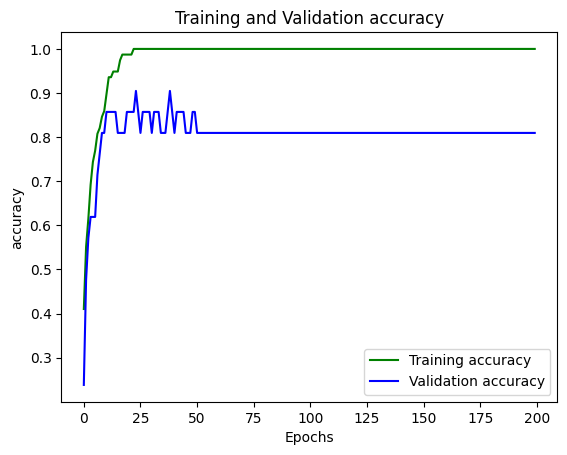

In [ ]:
#rnn
# Get training accuracy values
training_loss = history.history['accuracy']

# Get validation accuracy values
val_loss = history.history['val_accuracy']

# Define number of epochs
epochs = range(len(training_loss))

# Create a line plot for training and validation loss
plt.plot(epochs, training_loss, 'g', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
#evaluate model
model.evaluate(x_test,y_test)

In [ ]:
# RNN model
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# Reshape the input data for use in an RNN
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Define your RNN model
model = Sequential()
model.add(SimpleRNN(64,input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(4, activation='softmax'))

# Compile your RNN model
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Train your RNN model
history=model.fit(x_train, y_train, epochs=200,batch_size=32,validation_data=(x_test, y_test))


Epoch 1/200
3/3 [==============================] - 2s 242ms/step - loss: 1.3820 - accuracy: 0.3846 - val_loss: 1.1212 - val_accuracy: 0.5238
Epoch 2/200
3/3 [==============================] - 0s 32ms/step - loss: 1.2490 - accuracy: 0.4744 - val_loss: 1.0326 - val_accuracy: 0.6190
Epoch 3/200
3/3 [==============================] - 0s 34ms/step - loss: 1.1520 - accuracy: 0.5128 - val_loss: 0.9767 - val_accuracy: 0.6190
Epoch 4/200
3/3 [==============================] - 0s 40ms/step - loss: 1.0732 - accuracy: 0.5256 - val_loss: 0.9651 - val_accuracy: 0.5714
Epoch 5/200
3/3 [==============================] - 0s 34ms/step - loss: 1.0067 - accuracy: 0.5641 - val_loss: 0.9292 - val_accuracy: 0.7143
Epoch 6/200
3/3 [==============================] - 0s 35ms/step - loss: 0.9771 - accuracy: 0.6282 - val_loss: 0.9122 - val_accuracy: 0.7143
Epoch 7/200
3/3 [==============================] - 0s 41ms/step - loss: 0.9213 - accuracy: 0.6795 - val_loss: 0.9001 - val_accuracy: 0.6667
Epoch 8/200
3/3 [==

In [ ]:
#evaluate model
model.evaluate(x_test,y_test)

In [ ]:
# RNN model sparse, sgd,16
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# Reshape the input data for use in an RNN
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Define your RNN model
model = Sequential()
model.add(SimpleRNN(64,input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(4, activation='softmax'))

# Compile your RNN model
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Train your RNN model
history=model.fit(x_train, y_train, epochs=200,batch_size=16,validation_data=(x_test, y_test))
#evaluate model
model.evaluate(x_test,y_test)

Epoch 1/200
5/5 [==============================] - 3s 211ms/step - loss: 1.4234 - accuracy: 0.3333 - val_loss: 1.3587 - val_accuracy: 0.3810
Epoch 2/200
5/5 [==============================] - 0s 39ms/step - loss: 1.1526 - accuracy: 0.5000 - val_loss: 1.2022 - val_accuracy: 0.4762
Epoch 3/200
5/5 [==============================] - 0s 38ms/step - loss: 1.0097 - accuracy: 0.5513 - val_loss: 1.1794 - val_accuracy: 0.4286
Epoch 4/200
5/5 [==============================] - 0s 39ms/step - loss: 0.9282 - accuracy: 0.6154 - val_loss: 1.0755 - val_accuracy: 0.4762
Epoch 5/200
5/5 [==============================] - 0s 39ms/step - loss: 0.8601 - accuracy: 0.6154 - val_loss: 1.0177 - val_accuracy: 0.4762
Epoch 6/200
5/5 [==============================] - 0s 40ms/step - loss: 0.8107 - accuracy: 0.6410 - val_loss: 1.0373 - val_accuracy: 0.4286
Epoch 7/200
5/5 [==============================] - 0s 36ms/step - loss: 0.7856 - accuracy: 0.6154 - val_loss: 1.0187 - val_accuracy: 0.4286
Epoch 8/200
5/5 [==

[0.44905203580856323, 0.8571428656578064]

In [ ]:
# RNN model sparse, adam,32
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# Reshape the input data for use in an RNN
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Define your RNN model
model = Sequential()
model.add(SimpleRNN(64,input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(5, activation='softmax'))

# Compile your RNN model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train your RNN model
history=model.fit(x_train, y_train, epochs=100,batch_size=32,validation_data=(x_test, y_test))
#evaluate model
model.evaluate(x_test,y_test)

In [ ]:
# RNN model sparse, rmsprop,32
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# Reshape the input data for use in an RNN
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Define your RNN model
model = Sequential()
model.add(SimpleRNN(64,input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(4, activation='softmax'))

# Compile your RNN model
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

# Train your RNN model
history = model.fit(x_train, y_train, epochs=200,batch_size=32,validation_data=(x_test, y_test))
#evaluate model
model.evaluate(x_test,y_test)

Epoch 1/200
3/3 [==============================] - 3s 358ms/step - loss: 1.4191 - accuracy: 0.3205 - val_loss: 1.1312 - val_accuracy: 0.4286
Epoch 2/200
3/3 [==============================] - 0s 58ms/step - loss: 1.0574 - accuracy: 0.5513 - val_loss: 0.9279 - val_accuracy: 0.6667
Epoch 3/200
3/3 [==============================] - 0s 47ms/step - loss: 0.8788 - accuracy: 0.6667 - val_loss: 0.9465 - val_accuracy: 0.6667
Epoch 4/200
3/3 [==============================] - 0s 57ms/step - loss: 0.8113 - accuracy: 0.7179 - val_loss: 0.8696 - val_accuracy: 0.6667
Epoch 5/200
3/3 [==============================] - 0s 55ms/step - loss: 0.7527 - accuracy: 0.7692 - val_loss: 0.8551 - val_accuracy: 0.6190
Epoch 6/200
3/3 [==============================] - 0s 45ms/step - loss: 0.7169 - accuracy: 0.7692 - val_loss: 0.8507 - val_accuracy: 0.6667
Epoch 7/200
3/3 [==============================] - 0s 50ms/step - loss: 0.6500 - accuracy: 0.8333 - val_loss: 0.7528 - val_accuracy: 0.7619
Epoch 8/200
3/3 [==

[0.8867350220680237, 0.8095238208770752]

In [ ]:
# RNN model sparse, rmsprop,16
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# Reshape the input data for use in an RNN
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Define your RNN model
model = Sequential()
model.add(SimpleRNN(64,input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(4, activation='softmax'))

# Compile your RNN model
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

# Train your RNN model
history=model.fit(x_train, y_train, epochs=200,batch_size=16,validation_data=(x_test, y_test))
#evaluate model
model.evaluate(x_test,y_test)

Epoch 1/200
5/5 [==============================] - 5s 203ms/step - loss: 1.2186 - accuracy: 0.4744 - val_loss: 1.1079 - val_accuracy: 0.6190
Epoch 2/200
5/5 [==============================] - 0s 42ms/step - loss: 0.9450 - accuracy: 0.6154 - val_loss: 1.0491 - val_accuracy: 0.5714
Epoch 3/200
5/5 [==============================] - 0s 43ms/step - loss: 0.8254 - accuracy: 0.6667 - val_loss: 0.9755 - val_accuracy: 0.6667
Epoch 4/200
5/5 [==============================] - 0s 29ms/step - loss: 0.7835 - accuracy: 0.6410 - val_loss: 1.0451 - val_accuracy: 0.5238
Epoch 5/200
5/5 [==============================] - 0s 26ms/step - loss: 0.6832 - accuracy: 0.7051 - val_loss: 0.9407 - val_accuracy: 0.6190
Epoch 6/200
5/5 [==============================] - 0s 25ms/step - loss: 0.6380 - accuracy: 0.7692 - val_loss: 0.8669 - val_accuracy: 0.7143
Epoch 7/200
5/5 [==============================] - 0s 28ms/step - loss: 0.5878 - accuracy: 0.7564 - val_loss: 0.8184 - val_accuracy: 0.7143
Epoch 8/200
5/5 [==

[0.7685753703117371, 0.8095238208770752]

# LSTM (Long short term memory) model



In [ ]:
# LSTM model
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Reshape the input data for use in an RNN
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Define your LSTM model
model = Sequential()
model.add(LSTM(64,input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(LSTM(32))
model.add(Dense(4, activation='softmax'))

# Compile your LSTM model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train your LSTM model
history=model.fit(x_train, y_train, batch_size=16,epochs=200,validation_data=(x_test, y_test))


Epoch 1/200
5/5 [==============================] - 6s 240ms/step - loss: 1.3789 - accuracy: 0.3974 - val_loss: 1.3576 - val_accuracy: 0.5714
Epoch 2/200
5/5 [==============================] - 0s 29ms/step - loss: 1.3402 - accuracy: 0.4359 - val_loss: 1.3104 - val_accuracy: 0.6190
Epoch 3/200
5/5 [==============================] - 0s 33ms/step - loss: 1.2858 - accuracy: 0.4744 - val_loss: 1.2411 - val_accuracy: 0.6190
Epoch 4/200
5/5 [==============================] - 0s 33ms/step - loss: 1.1960 - accuracy: 0.5128 - val_loss: 1.1202 - val_accuracy: 0.5714
Epoch 5/200
5/5 [==============================] - 0s 32ms/step - loss: 1.0860 - accuracy: 0.5385 - val_loss: 0.9988 - val_accuracy: 0.6190
Epoch 6/200
5/5 [==============================] - 0s 30ms/step - loss: 1.0208 - accuracy: 0.5513 - val_loss: 0.9380 - val_accuracy: 0.5714
Epoch 7/200
5/5 [==============================] - 0s 28ms/step - loss: 1.0071 - accuracy: 0.5769 - val_loss: 0.8872 - val_accuracy: 0.5714
Epoch 8/200
5/5 [==

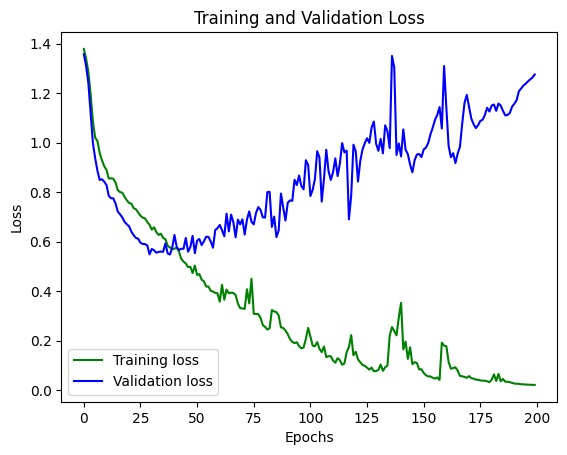

In [ ]:
# Get training loss values
training_loss = history.history['loss']

# Get validation loss values
val_loss = history.history['val_loss']

# Define number of epochs
epochs = range(len(training_loss))

# Create a line plot for training and validation loss
plt.plot(epochs, training_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

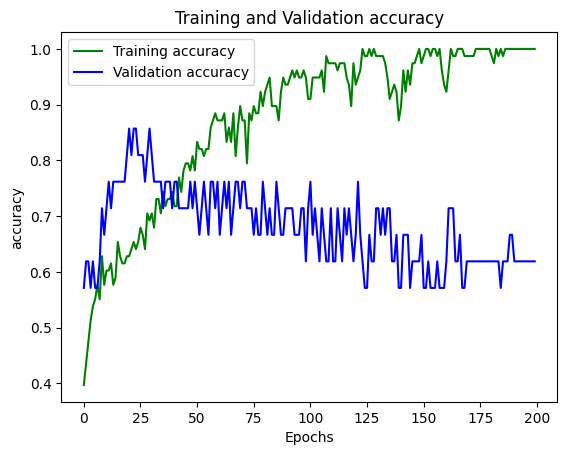

In [ ]:
# Get training loss values
training_loss = history.history['accuracy']

# Get validation loss values
val_loss = history.history['val_accuracy']

# Define number of epochs
epochs = range(len(training_loss))

# Create a line plot for training and validation loss
plt.plot(epochs, training_loss, 'g', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
#evaluate model
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 46ms/step - loss: 0.5943 - accuracy: 0.7143


[0.5943339467048645, 0.7142857313156128]

In [ ]:
#model.score(x_test,y_test)

AttributeError: ignored

In [ ]:
# LSTM model adam 32
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Reshape the input data for use in an RNN
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Define your RNN model
model = Sequential()
model.add(LSTM(64,input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(LSTM(32))
model.add(Dense(4, activation='softmax'))

# Compile your RNN model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train your RNN model
history=model.fit(x_train, y_train, epochs=200,batch_size=32,validation_data=(x_test, y_test))
#evaluate model
model.evaluate(x_test,y_test)

Epoch 1/200
3/3 [==============================] - 6s 594ms/step - loss: 1.3776 - accuracy: 0.2692 - val_loss: 1.3683 - val_accuracy: 0.5238
Epoch 2/200
3/3 [==============================] - 0s 49ms/step - loss: 1.3543 - accuracy: 0.4615 - val_loss: 1.3469 - val_accuracy: 0.5714
Epoch 3/200
3/3 [==============================] - 0s 49ms/step - loss: 1.3276 - accuracy: 0.5256 - val_loss: 1.3209 - val_accuracy: 0.5238
Epoch 4/200
3/3 [==============================] - 0s 46ms/step - loss: 1.2928 - accuracy: 0.5128 - val_loss: 1.2878 - val_accuracy: 0.5238
Epoch 5/200
3/3 [==============================] - 0s 47ms/step - loss: 1.2500 - accuracy: 0.5000 - val_loss: 1.2475 - val_accuracy: 0.5714
Epoch 6/200
3/3 [==============================] - 0s 47ms/step - loss: 1.1963 - accuracy: 0.4744 - val_loss: 1.1986 - val_accuracy: 0.5238
Epoch 7/200
3/3 [==============================] - 0s 60ms/step - loss: 1.1584 - accuracy: 0.4744 - val_loss: 1.1564 - val_accuracy: 0.4286
Epoch 8/200
3/3 [==

[1.1568242311477661, 0.5714285969734192]

In [ ]:
# LSTM model sgd, 32
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Reshape the input data for use in an RNN
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Define your RNN model
model = Sequential()
model.add(LSTM(64,input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(LSTM(32))
model.add(Dense(4, activation='softmax'))

# Compile your RNN model
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Train your RNN model
history=model.fit(x_train, y_train, epochs=200,batch_size=32,validation_data=(x_test, y_test))


Epoch 1/200
3/3 [==============================] - 5s 441ms/step - loss: 1.3907 - accuracy: 0.1795 - val_loss: 1.3669 - val_accuracy: 0.3810
Epoch 2/200
3/3 [==============================] - 0s 34ms/step - loss: 1.3664 - accuracy: 0.3846 - val_loss: 1.3438 - val_accuracy: 0.3333
Epoch 3/200
3/3 [==============================] - 0s 43ms/step - loss: 1.3447 - accuracy: 0.4487 - val_loss: 1.3181 - val_accuracy: 0.5714
Epoch 4/200
3/3 [==============================] - 0s 55ms/step - loss: 1.3208 - accuracy: 0.5128 - val_loss: 1.2858 - val_accuracy: 0.5714
Epoch 5/200
3/3 [==============================] - 0s 64ms/step - loss: 1.2889 - accuracy: 0.5256 - val_loss: 1.2433 - val_accuracy: 0.6667
Epoch 6/200
3/3 [==============================] - 0s 59ms/step - loss: 1.2475 - accuracy: 0.5769 - val_loss: 1.1864 - val_accuracy: 0.7143
Epoch 7/200
3/3 [==============================] - 0s 70ms/step - loss: 1.1887 - accuracy: 0.5641 - val_loss: 1.1129 - val_accuracy: 0.6667
Epoch 8/200
3/3 [==

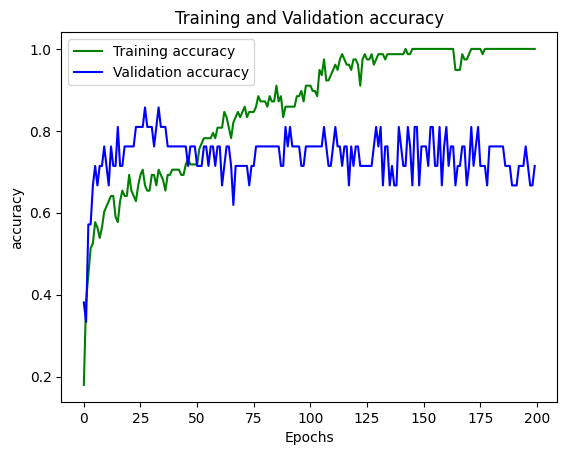

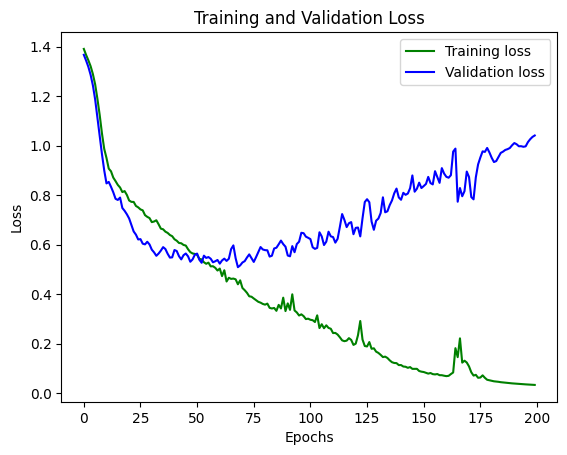

In [ ]:
# Get training loss values
training_loss = history.history['accuracy']
# Get validation loss values
val_loss = history.history['val_accuracy']
# Define number of epochs
epochs = range(len(training_loss))
# Create a line plot for training and validation loss
plt.plot(epochs, training_loss, 'g', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
# Get training loss values
training_loss = history.history['loss']
# Get validation loss values
val_loss = history.history['val_loss']
# Define number of epochs
epochs = range(len(training_loss))
# Create a line plot for training and validation loss
plt.plot(epochs, training_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#evaluate model
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 30ms/step - loss: 0.6352 - accuracy: 0.7143


[0.6352473497390747, 0.7142857313156128]

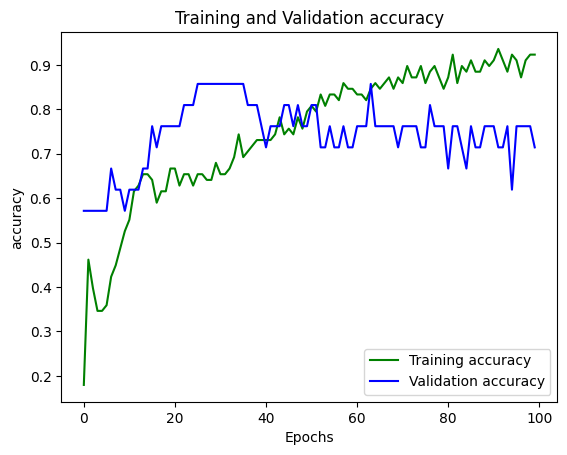

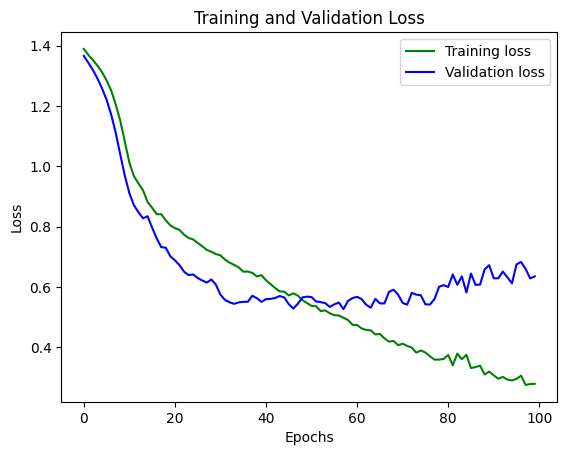

In [ ]:
# Get training loss values
training_loss = history.history['accuracy']

# Get validation loss values
val_loss = history.history['val_accuracy']

# Define number of epochs
epochs = range(len(training_loss))

# Create a line plot for training and validation loss
plt.plot(epochs, training_loss, 'g', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
# Get training loss values
training_loss = history.history['loss']

# Get validation loss values
val_loss = history.history['val_loss']

# Define number of epochs
epochs = range(len(training_loss))

# Create a line plot for training and validation loss
plt.plot(epochs, training_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# LSTM model sgd, 32
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Reshape the input data for use in an RNN
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Define your RNN model
model = Sequential()
model.add(LSTM(64,input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(LSTM(32))
model.add(Dense(4, activation='softmax'))

# Compile your RNN model
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Train your RNN model
history=model.fit(x_train, y_train, epochs=200,batch_size=16)


Epoch 1/200
5/5 [==============================] - 4s 28ms/step - loss: 1.3806 - accuracy: 0.3718
Epoch 2/200
5/5 [==============================] - 0s 30ms/step - loss: 1.3731 - accuracy: 0.3205
Epoch 3/200
5/5 [==============================] - 0s 27ms/step - loss: 1.3662 - accuracy: 0.3718
Epoch 4/200
5/5 [==============================] - 0s 30ms/step - loss: 1.3597 - accuracy: 0.3718
Epoch 5/200
5/5 [==============================] - 0s 33ms/step - loss: 1.3547 - accuracy: 0.3974
Epoch 6/200
5/5 [==============================] - 0s 28ms/step - loss: 1.3492 - accuracy: 0.4103
Epoch 7/200
5/5 [==============================] - 0s 32ms/step - loss: 1.3440 - accuracy: 0.3974
Epoch 8/200
5/5 [==============================] - 0s 34ms/step - loss: 1.3402 - accuracy: 0.3974
Epoch 9/200
5/5 [==============================] - 0s 35ms/step - loss: 1.3363 - accuracy: 0.3846
Epoch 10/200
5/5 [==============================] - 0s 35ms/step - loss: 1.3323 - accuracy: 0.3846
Epoch 11/200
5/5 [=

In [ ]:
#evaluate model
model.evaluate(x_test,y_test)

1/1 [==============================] - 1s 1s/step - loss: 0.9283 - accuracy: 0.5714


[0.9282664060592651, 0.5714285969734192]

In [ ]:
# LSTM model rmsprop, 16
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Reshape the input data for use in an RNN
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Define your RNN model
model = Sequential()
model.add(LSTM(64,input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(LSTM(32))
model.add(Dense(4, activation='softmax'))

# Compile your RNN model
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

# Train your RNN model
history=model.fit(x_train, y_train, epochs=200,batch_size=16,validation_data=(x_test, y_test))
#evaluate model
model.evaluate(x_test,y_test)

Epoch 1/200
5/5 [==============================] - 5s 281ms/step - loss: 1.3566 - accuracy: 0.3462 - val_loss: 1.2730 - val_accuracy: 0.5714
Epoch 2/200
5/5 [==============================] - 0s 42ms/step - loss: 1.2104 - accuracy: 0.4615 - val_loss: 1.1136 - val_accuracy: 0.5714
Epoch 3/200
5/5 [==============================] - 0s 44ms/step - loss: 1.1146 - accuracy: 0.5000 - val_loss: 1.0613 - val_accuracy: 0.7143
Epoch 4/200
5/5 [==============================] - 0s 46ms/step - loss: 1.0499 - accuracy: 0.5513 - val_loss: 0.9939 - val_accuracy: 0.7143
Epoch 5/200
5/5 [==============================] - 0s 38ms/step - loss: 0.9938 - accuracy: 0.6282 - val_loss: 0.9478 - val_accuracy: 0.7143
Epoch 6/200
5/5 [==============================] - 0s 35ms/step - loss: 0.9784 - accuracy: 0.5769 - val_loss: 0.8873 - val_accuracy: 0.6667
Epoch 7/200
5/5 [==============================] - 0s 33ms/step - loss: 0.9422 - accuracy: 0.5513 - val_loss: 0.8658 - val_accuracy: 0.6667
Epoch 8/200
5/5 [==

[1.077078104019165, 0.6190476417541504]

In [ ]:
# LSTM model rmsprop, 32
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Reshape the input data for use in an RNN
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Define your LSTM model
model = Sequential()
model.add(LSTM(64,input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(LSTM(32))
model.add(Dense(4, activation='softmax'))

# Compile your LSTM model
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

# Train your LSTM model
history=model.fit(x_train, y_train, epochs=200,batch_size=32,validation_data=(x_test, y_test))
#evaluate model
model.evaluate(x_test,y_test)

Epoch 1/200
3/3 [==============================] - 8s 578ms/step - loss: 1.3813 - accuracy: 0.2949 - val_loss: 1.3453 - val_accuracy: 0.4286
Epoch 2/200
3/3 [==============================] - 0s 49ms/step - loss: 1.3395 - accuracy: 0.3846 - val_loss: 1.2888 - val_accuracy: 0.5238
Epoch 3/200
3/3 [==============================] - 0s 54ms/step - loss: 1.2694 - accuracy: 0.4487 - val_loss: 1.2296 - val_accuracy: 0.5238
Epoch 4/200
3/3 [==============================] - 0s 55ms/step - loss: 1.1776 - accuracy: 0.4872 - val_loss: 1.1608 - val_accuracy: 0.5714
Epoch 5/200
3/3 [==============================] - 0s 71ms/step - loss: 1.1354 - accuracy: 0.4615 - val_loss: 1.1056 - val_accuracy: 0.5714
Epoch 6/200
3/3 [==============================] - 0s 70ms/step - loss: 1.1059 - accuracy: 0.5513 - val_loss: 1.0990 - val_accuracy: 0.5714
Epoch 7/200
3/3 [==============================] - 0s 75ms/step - loss: 1.0868 - accuracy: 0.5256 - val_loss: 1.0877 - val_accuracy: 0.5714
Epoch 8/200
3/3 [==

[0.6866514682769775, 0.761904776096344]